In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from logistic_regression import LogisticRegression
from softmax_regression import SoftmaxRegression

### Read the iris dataset

There are totally 150 samples.
+: 100
-: 50


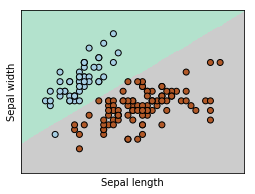

In [7]:
iris = datasets.load_iris()
X = iris.data[:, :2] # use only the first two features
Y = iris.target
n_samples = iris.data.shape[0]
Y[Y == 2] = 1 # change to a 2-class problem


def show_label_partition(Y):
    print("There are totally {} samples.".format(len(Y)))
    print("+:", np.sum(Y==1))
    print("-:", np.sum(Y==0))

def fit_plot(X, Y, fit_classifier=True):
    h = .02 # mesh step size
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    if fit_classifier:
        # we create an instance of Neighbours Classifier and fit the data.
        logreg = SoftmaxRegression(l2=1e-5)
        logreg.fit(X, Y)
        Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.figure(1, figsize=(4, 3))
        plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel2)
    
    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

    plt.show()

show_label_partition(Y)
fit_plot(X, Y, fit_classifier=True)

### Transferring to PU

 - sample 50% of +, the left becomes P
 - flip sampled + to -
 - join flipped + with - as U

There are totally 150 samples.
+: 48
-: 102


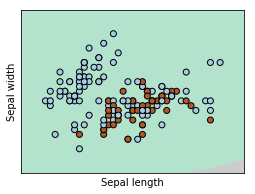

In [8]:
np.random.seed(42)
flip = np.random.rand(n_samples)
Y_pu = Y.copy()
Y_pu[(Y == 1) & (flip < 0.5)] = 0
show_label_partition(Y_pu)
fit_plot(X, Y_pu, fit_classifier=True)